In [ ]:
# @title Installation of relevant packages
#####openaAI clip

!conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.8
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install pycairo
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install typing_extensions==4.4.0

#OpenCV and PyCairo
#!pip install opencv-contrib-python
!pip install Pillow
#very slow workaround to get install of pycairo working; previous error: failed building wheel for pycairo
!apt-get install sox ffmpeg libcairo2 libcairo2-dev
!apt-get install texlive-full
!pip install manimlib
!pip install manimce

#if anything doesnt work run the deinstalls at the bottom, rerun these installs and restart the runtime and run JUST the code again!

/bin/bash: line 1: conda: command not found
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-2efibhbw
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-2efibhbw
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 796.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/

  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.23 requires typing-extensions>=4.2.0, but you have typing-extensions 3.10.0.2 which is incompatible.
arviz 0.15.1 requires typing-extensions>=4.1.0, but you have typing-extensions 3.10.0.2 which is incompatible.
azure-core 1.29.5 requires typing-extensions>=4.6.0, but you have typing-extensions 3.10.0.2 which is incompatible.
azure-storage-blob 12.19.0 requires typing-extensions>=4.3.0, but you have typing-extensions 3.10.0.2 which is incompatible.
azure-storage-file-datalake 12.14.0 requires typing-extensions>=4.3.0, but you have typing-ext

In [ ]:
# @title Check for Cuda Version
!nvcc -V#to know the cuda version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
# @title Function to classify image
#function to run call to classify and sort images, returns True if a powerpoint, false otherwise

#this block is needed with install azure to avoid name _C is not defined error
import typing_extensions
from importlib import reload
reload(typing_extensions)
!pip install azure.ai.ml

import torch
import clip
from PIL import Image

def classify_image(imgName):
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model, preprocess = clip.load("ViT-B/32", device=device)

  image = preprocess(Image.open(imgName)).unsqueeze(0).to(device)
  #text = clip.tokenize(["a powerpoint", "a desktop"]).to(device)
  text = clip.tokenize(["a powerpoint", "a desktop", "a powerpoint covered by another window"]).to(device)#actual prompt


  with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()
  print("Chance that the image is a powerpoint, a desktop, OR a powerpoint covered by another window",probs)
  if probs[0,0] >= 0.6 or probs[0,1]<=0.5 or probs[0,2]<=0.5:
    return True

  else:
    return False






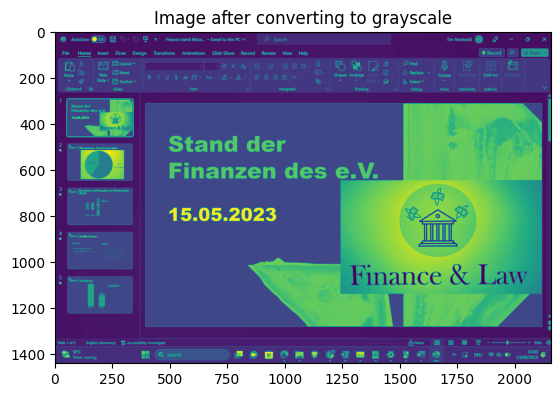

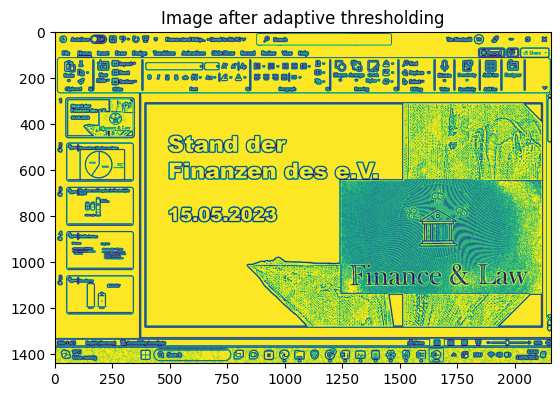

Screenshot of the largest contour saved as largest_contour_screenshot.png


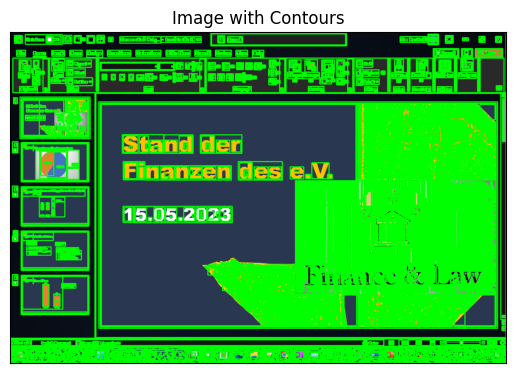

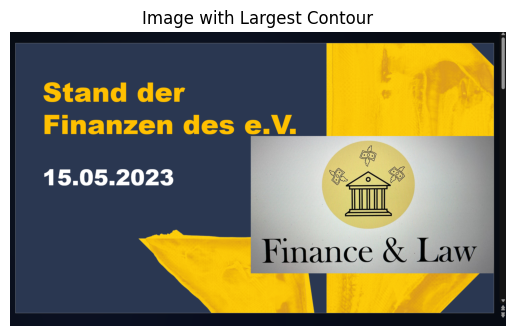

Chance that the image is a powerpoint, a desktop, OR a powerpoint covered by another window [[0.3347  0.02042 0.645  ]]


True

In [ ]:
# @title Cell to identify and pass forward largest image contour
import cv2
import numpy as np
import io
import cairo
from PIL import Image
from matplotlib import pyplot as plt

# Load the screenshot image (replace with actual image path)
screenshot = cv2.imread('image_name.png')
assert screenshot is not None, "file could not be read, check with os.path.exists()"


# Convert the image to grayscale
gray = cv2.cvtColor(screenshot, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.title("Image after converting to grayscale")
plt.show()


 #will attempt adaptive thresholding instead of binary thresholding to avoid dark areas
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(thresh)
plt.title("Image after adaptive thresholding")
plt.show()




# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Get the largest contour based on area
largest_contour = max(contours, key=cv2.contourArea)



# Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the screenshot to the bounding box of the largest contour
cropped_image = screenshot[y:y+h, x:x+w]

# Convert the cropped image to RGB (OpenCV uses BGR by default)
cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

# Save the cropped image to a BytesIO object
output_buffer = io.BytesIO()
Image.fromarray(cropped_image_rgb).save(output_buffer, format='PNG')
output_buffer.seek(0)

# Create a PyCairo surface and context from the cropped image
cairo_surface = cairo.ImageSurface.create_from_png(output_buffer)
cairo_context = cairo.Context(cairo_surface)

# Save the PyCairo surface to an image file
cairo_surface.write_to_png('largest_contour_screenshot.png')

print('Screenshot of the largest contour saved as largest_contour_screenshot.png')


# Load the saved PNG image
largest_contour_image = Image.open('largest_contour_screenshot.png')

# draw squares around recognized contours

for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(screenshot, (x,y), (x+w, y+h), (0,255,0), 3)




# Display the original image with rectangles
plt.imshow(cv2.cvtColor(screenshot, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours'), plt.xticks([]), plt.yticks([])
plt.show()


# Display the largest contour image using matplotlib
plt.imshow(largest_contour_image)
plt.title('Image with Largest Contour')
plt.axis('off')  # Hide axes
plt.show()


classify_image("largest_contour_screenshot.png")

In [ ]:
#@title Cell to run deinstalls if issues persist
#temporary cell to reinstall subpackets that sometimes cause problems
!pip uninstall torch
!pip uninstall torchvision

Found existing installation: torch 2.1.0+cu118
Uninstalling torch-2.1.0+cu118:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/nvfuser/*
    /usr/local/lib/python3.10/dist-packages/torch-2.1.0+cu118.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.1.0+cu118
Found existing installation: torchvision 0.16.0+cu118
Uninstalling torchvision-0.16.0+cu118:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchvision-0.16.0+cu118.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libcudart.60cfec8e.so.11.0
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libnvjpeg.7053040